# Loading modules

In [11]:
from IPython.display import display, HTML

# Visualisation tools
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns

# Processing tools
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.metrics import accuracy_score

# sklearn models
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [25]:
gender_sub = pd.read_csv('data/gender_submission.csv')
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# Having a look at inputs

In [ ]:
print(train.shape)
print(train.groupby('Survived').size())
train['Cabin'] = len(train['Cabin'].unique())
print('Name:', len(train['Name'].unique()))
print('Ticket:', len(train['Ticket'].unique()))
print('Embarked:', len(train['Embarked'].unique()))


In [ ]:
display(gender_sub.head())
display(train.head())
display(test.head())

# Now lets do some quick exploratory analysis with graphs.

Survived
0    549
1    342
Name: Survived, dtype: int64

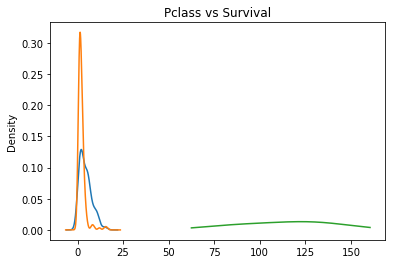

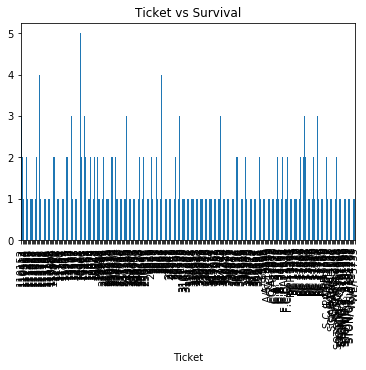

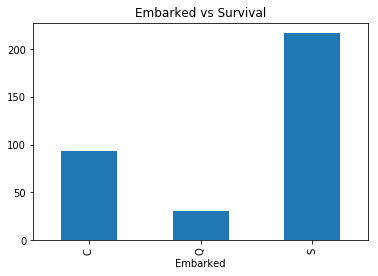

In [27]:
fig = plt.figure()
display(train.groupby('Survived')['Survived'].count())
train_survived = train[train['Survived'] == 1]
# Hi lukas, change bar/density/line graphs. more plotmethods available at 
# https://kite.com/python/docs/pandas.plotting._core.SeriesPlotMethods?page=1
#train_survived.groupby('Age')['Age'].count().plot.bar()
train_survived.groupby('Age')['Age'].count().plot.density(title="Age vs Survival")
plt.show()
train_survived.groupby('Fare')['Fare'].count().plot.density(title="Fare vs Survival")
plt.show()
train_survived.groupby('Pclass')['Pclass'].count().plot.bar(title="Pclass vs Survival")
plt.show()
train_survived.groupby('Ticket')['Ticket'].count().plot.bar(title="Ticket vs Survival")
plt.show()
train_survived.groupby('Embarked')['Embarked'].count().plot.bar(title="Embarked vs Survival")
plt.show()

# Selecting and encoding features/labels

In [24]:
gender_sub = pd.read_csv('data/gender_submission.csv')
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# Drop name
train = train.drop(columns=['Name'])

train['Age'] = train.fillna(train['Age'].mean())
train = train.fillna('0')

display(train.head())

categories_to_encode = ['Cabin', 'Embarked', 'Ticket', 'Sex']
for c in categories_to_encode:
    le = LabelEncoder()
    train[c] = le.fit_transform(train[c])

display(train.head())

features_to_drop = ['Cabin']
features = train.drop(columns=features_to_drop)
labels = features.pop('Survived').values


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,1,1,0,A/5 21171,7.2500,0,S
1,2,1,1,female,2,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,3,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,female,4,1,0,113803,53.1000,C123,S
4,5,0,3,male,5,0,0,373450,8.0500,0,S


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,1,1,0,523,7.2500,0,3
1,2,1,1,0,2,1,0,596,71.2833,82,1
2,3,1,3,0,3,0,0,669,7.9250,0,3
3,4,1,1,0,4,1,0,49,53.1000,56,3
4,5,0,3,1,5,0,0,472,8.0500,0,3


# Testing different classifier models.

/home/wasabi/sam/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/wasabi/sam/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/wasabi/sam/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/wasabi/sam/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/wasabi/sam/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 

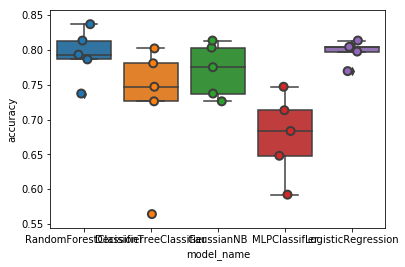

model_name
DecisionTreeClassifier    0.724171
GaussianNB                0.771180
LogisticRegression        0.797983
MLPClassifier             0.676903
RandomForestClassifier    0.793576
Name: accuracy, dtype: float64


In [23]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    DecisionTreeClassifier(),
    #KNeighborsClassifier(),
    #LinearSVC(),
    #SGDClassifier(loss='hinge', class_weight='balanced'),
    #MultinomialNB(),
    GaussianNB(),
    MLPClassifier(),
    #GradientBoostingClassifier(),
    LogisticRegression(random_state=0),
]
CV = 5 # Folds in data
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()
print(cv_df.groupby('model_name').accuracy.mean())

In [22]:
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    labels, 
                                                    test_size=0.2, 
                                                    random_state=0)
clf = LogisticRegression()
clf.fit(X_train, y_train) 

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_pred, y_test)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.7988826815642458


/home/wasabi/sam/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
